# Protein Enrichment Analysis: Unlocking Functional Insights
Welcome to an immersive tutorial experience in Bioinformatics, where this session introduces you to the powerful world of protein enrichment analysis. This journey takes you to the heart of proteomics, providing a detailed exploration of techniques used to discern the biological pathways and processes most relevant to your set of proteins.

Throughout this tutorial, we will unravel the complexities of analyzing large sets of proteins, often derived from high-throughput experiments, and the methods used to identify significantly enriched biological terms associated with them. From understanding the basics of protein functions and interactions to diving into the utilization of tools like `biopython` and `g:Profiler`, this session is brimming with information that lays a solid groundwork and ascends into the intricacies of enrichment analyses.

Whether you are stepping into the field of proteomics for the first time or are an experienced researcher seeking to broaden your analytical arsenal, this guide is designed to equip you with the practical knowledge and competencies needed to conduct robust, insightful enrichment analyses. By the end of this journey, you will possess a deeper understanding of your proteins of interest, ready to unlock the hidden stories they hold within biological systems. So, prepare to harness the capabilities of bioinformatic tools and methodologies that await in this enriching learning adventure.

In [2]:
!pip install biopython
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Data import IUPACData

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.9 MB/s eta 0:00:00


# Protein Sequence Basics

Let's start by creating a simple protein sequence. Proteins are made up of long chains of amino acids, and they are typically represented by sequences of letters, where each letter represents an amino acid.

In [3]:
protein_sequence = Seq("AGTACACTGGT")
print("Protein sequence:", protein_sequence)
print("Protein length:", len(protein_sequence))

Protein sequence: AGTACACTGGT
Protein length: 11


# Translating RNA to Protein

If you have an RNA sequence, it can be translated into a protein sequence. The genetic code is used for this translation, converting three nucleotides (a codon) into one amino acid.

In [8]:
rna_sequence = Seq("AUGGCCAUUGUAAUGGGCCGCAUGAAGGGUGCCCGAAAG")
protein_sequence = rna_sequence.translate()
print("Protein Sequence:", protein_sequence)

Protein Sequence: MAIVMGRMKGARK


# Analyzing Amino Acid Composition

You might want to analyze the composition of a protein in terms of its amino acid content.

In [9]:
amino_acid_count = {}
for amino_acid in protein_sequence:
    if amino_acid in amino_acid_count:
        amino_acid_count[amino_acid] += 1
    else:
        amino_acid_count[amino_acid] = 1

print("Amino acid composition:", amino_acid_count)

Amino acid composition: {'M': 3, 'A': 2, 'I': 1, 'V': 1, 'G': 2, 'R': 2, 'K': 2}


# Finding Molecular Weight

You can find the molecular weight of a protein sequence using Biopython. Molecular weight is essential for various biochemical and analytical purposes.

In [10]:
from Bio.SeqUtils import molecular_weight

# Calculate the molecular weight (in Daltons)
mw = molecular_weight(protein_sequence, seq_type="protein")
print("Molecular weight:", mw)

Molecular weight: 1448.8663


# Reading Protein from Files

Often, you will have to read protein sequences stored in files (common formats: FASTA, GenBank, etc.).

In [12]:
# For this example, we are reading from a FASTA file.
# You'll have to upload your FASTA file to Colab.

for record in SeqIO.parse("gene.fna", "fasta"):
    print("ID", record.id)
    print("Sequence", record.seq)
    print("Length", len(record.seq))

ID NC_000003.12:148697903-148743003
Sequence ATTCCAGCGCCTGACAGCCAGGACCCCAGGCAGCAGCGAGTGACAGGACGTCTGGACCGGCGCGCCGCTAGCAGCTCTGCCGGGCCGCGGCGGTGATCGATGGGGAGCGGCTGGAGCGGACCCAGCGAGTGAGGGCGCACAGCCGGGACGCCGAGGCGGCGGGCGGGAGACCCGCACCAGCGCAGCCGGCCCTCGGCGGGACGTGACGCAGCGCCCGGGGCGCGGGTGAGTCCGCGCGGACCGCCAGGCATGCTTGGGGGACTTCAAGGGCGGGGTGCTAAGTTTCATGTCACGGTGTCCTAACTGCTGGCTCTATACTGGGAAGCTCTCGGGGACCAAGGAAAGAGCGACCGTAGTTCTGGTCAGCGCCTGCCCCTGGAGCTGGCCACACTTTCCCAAATCAGGTGAGGGGCTTCTGGAATGGGAGGGAACAAGGTAGGTTTGTTTGCCACGTGCCTCGAAATTCTCAATCCATTTTAACCAAACTCTTCCGAGTGCAAGGAAGAAATCTACAGAAATAAGATGCAATTCAATAAACTTTCTTCCTGAGGCTTTTAGTTAACTCTTGTATTTTAGCCATCATCTGAGCGGGAAGCCGGTATGACTCTGCAAGGCGTTCGTTTAAAAGTTGTGCTACTTTTGAGGTGAAGTTAAGAGTGTCTCCATCCACGCCCTCTGCTTCCCAGTCAATGTCCCTGCACTGCTCACGTCCCTTTAGCTCTCTCCCTGCAAACCATAGCGGTGGGTCCTAGACACGGGACATCGCTCCAACCTTGGCCAAACTCTCCCACCCTCAGGGTTCCCAGATGTCCTTTGAATAATCAAACTGAGGAAGGAGAAGCAAGATGTCTCCACACCCCAATCCCTACAGCCTTAGCCAATGCATGTGTGTAACTGAGACAGAATTTTAGCAAAAGGTCTCCTGCTTCCAGGACTAAACAGAGCCTCTGGCAGG

In [13]:
!pip install gprofiler-official
from gprofiler import GProfiler

# Prepare your list of proteins

In a real-world scenario, you might have a list of protein identifiers from an experiment. Here, we'll create a mock list for demonstration purposes. These are usually UniProt identifiers or gene symbols.

In [14]:
# Sample list of proteins, usually you would import this from your dataset
protein_list = ['TP53', 'EGFR', 'BRCA1', 'APC', 'TNF', 'MTOR', 'AKT1']

# Perform enrichment analysis

Now we'll use `g:Profiler` to check for enrichment in various biological databases like GO (Gene Ontology), KEGG, Reactome pathways, etc.

In [15]:
# Initialize
gp = GProfiler(return_dataframe=True)

# Run the enrichment analysis
results = gp.profile(organism='hsapiens',  # human as example
                     query=protein_list,
                     sources=["GO", "KEGG", "REAC"],  # sources for enrichment
                     user_threshold=0.05,  # p-value threshold
                     all_results=False,  # retrieve significant results only
                     )

# Show the results
print(results)

    source      native                                               name  \
0     KEGG  KEGG:05224                                      Breast cancer   
1     KEGG  KEGG:05210                                  Colorectal cancer   
2    GO:BP  GO:0007346                   regulation of mitotic cell cycle   
3    GO:BP  GO:0072359                     circulatory system development   
4     KEGG  KEGG:05165                     Human papillomavirus infection   
..     ...         ...                                                ...   
366  GO:MF  GO:0004674           protein serine/threonine kinase activity   
367  GO:BP  GO:2001234  negative regulation of apoptotic signaling pat...   
368  GO:CC  GO:0097489        multivesicular body, internal vesicle lumen   
369  GO:BP  GO:0007431                         salivary gland development   
370  GO:BP  GO:0002360                          T cell lineage commitment   

          p_value  significant  \
0    1.043150e-08         True   
1    1.

# Analyzing and visualizing the results

The resulting dataframe contains several columns that provide information about the enriched terms, including their p-values, the proteins involved, and a description of the enriched biological processes or pathways. You can filter, sort, or visualize this information to gain insights into your dataset.

For instance, to just get the top 5 significantly enriched processes, you might do:

In [16]:
top_results = results.sort_values('p_value').head(5)
print(top_results[['source', 'name', 'p_value', 'intersection_size']])

  source                              name       p_value  intersection_size
0   KEGG                     Breast cancer  1.043150e-08                  6
1   KEGG                 Colorectal cancer  1.170241e-07                  5
2  GO:BP  regulation of mitotic cell cycle  1.098126e-06                  6
3  GO:BP    circulatory system development  1.194253e-06                  7
4   KEGG    Human papillomavirus infection  1.412175e-06                  6


For visualization, you can use plotting libraries like `matplotlib` or `seaborn` to create plots from your data. For example, a bar plot showing the -log(p-value) for the top N significant terms can give a visual representation of enrichment significance.

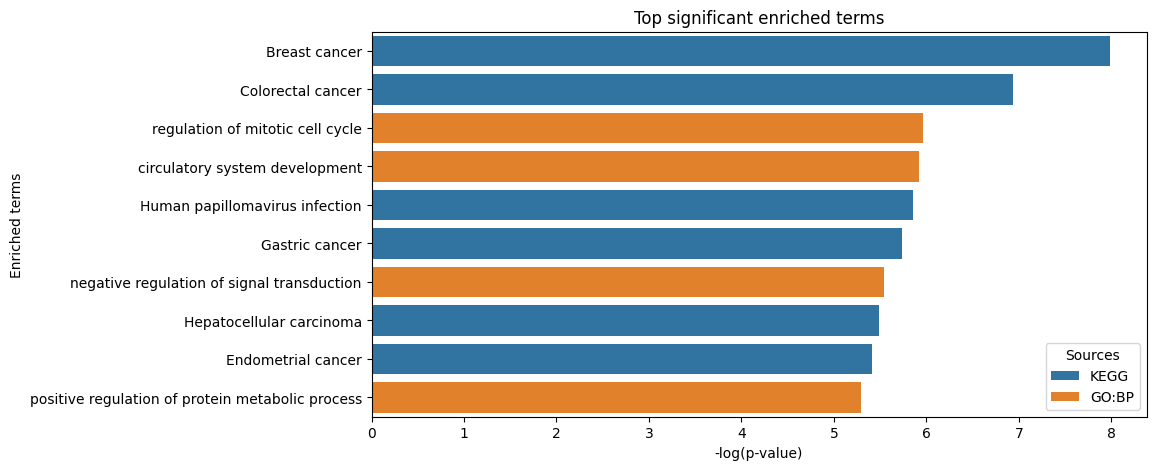

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate -log(p-value) for visualization clarity
results['minuslog_pvalue'] = -np.log10(results['p_value'])

# Sort the results by significance
top_results_vis = results.sort_values('minuslog_pvalue', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_results_vis.head(10), x='minuslog_pvalue', y='name', hue='source', dodge=False)
plt.xlabel('-log(p-value)')
plt.ylabel('Enriched terms')
plt.title('Top significant enriched terms')
plt.legend(title='Sources')
plt.show()